In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
print( "no fraud", round(df["Class"].value_counts()[0]/len(df["Class"]) *  100 , 2), "% of the dataset")
print("fraud", round(df["Class"].value_counts()[1]/len(df) * 100, 2), "% of the dataset ")

no fraud 99.83 % of the dataset
fraud 0.17 % of the dataset 


##### as we can see there is no missing values but there is huge unbalance of the target class

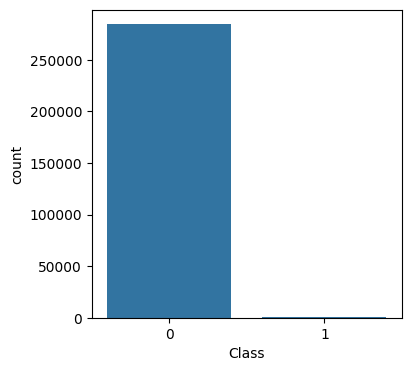

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(df,x = "Class", ax= ax )
plt.show();

In [9]:
#Time and Amount should be scaled as the other features 

from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df["scaled_amount"] = rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
df["scaled_time"] = std_scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df.drop(["Time", "Amount"], axis = 1, inplace = True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold

X = df.drop("Class", axis = 1)
y = df["Class"]

sss = StratifiedShuffleSplit(n_splits = 5, random_state=None)

for train_index, test_index in sss.split(X, y):
    original_Xtrian, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrian = original_Xtrian.values
original_ytest = original_ytest.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)


In [11]:
print("Label DIstributions: \n")
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

Label DIstributions: 

[0.99827173 0.00172827]
[0.99827955 0.00172045]


In [12]:
#since out classes are highly skewed we should make them equivalent in order to have a normal distribution of classes 

#lets shuffle before creating subsamples 

df = df.sample(frac = 1)

#amount of fraud clases 492 rows 

fraud_df = df.loc[df["Class"]==1]
non_fraud_df = df.loc[df["Class"]==0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#shuffle dataframe rows

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
149203,-0.886525,1.004450,0.924781,0.087140,0.786467,-0.096659,0.827427,-0.407403,1.650816,-0.096511,...,-0.520660,-0.535491,-0.630638,0.537060,0.409900,-0.269583,-0.390565,0,0.390554,-0.084524
74794,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,-0.049233,...,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,1,4.051003,-0.822393
152454,0.219124,0.310223,1.419952,-0.607486,0.446068,0.888235,0.137781,-0.222253,2.017144,-0.202849,...,0.576209,0.071573,0.069822,-1.721725,0.229371,-0.217055,-0.186904,0,-0.084539,0.053953
156990,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,-4.458008,...,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,1,2.293440,0.305006
222133,-3.613850,-0.922136,-4.749887,3.373001,-0.545207,-1.171301,-4.172315,1.517016,-1.775833,-3.754054,...,0.893065,1.034907,0.097671,-1.345551,-0.788329,1.055442,0.099971,1,1.715923,1.011331


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


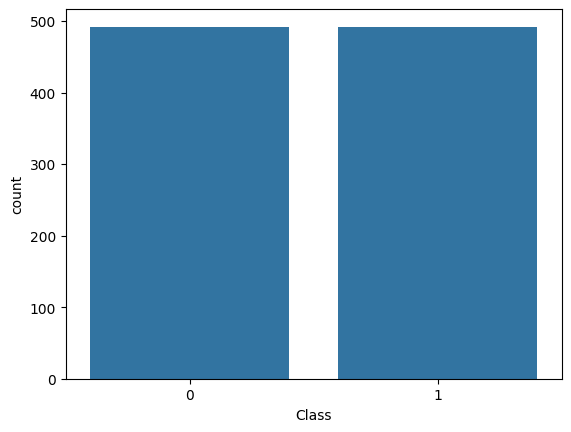

In [13]:
print("Distribution of the Classes in the subsample dataset")
print(new_df["Class"].value_counts()/len(new_df))

sns.countplot(data = new_df,x = "Class")
plt.show()

##### correlation matrices 


Text(0.5, 1.0, 'sub sample correlation matricx \n (wecan use it as a reference)')

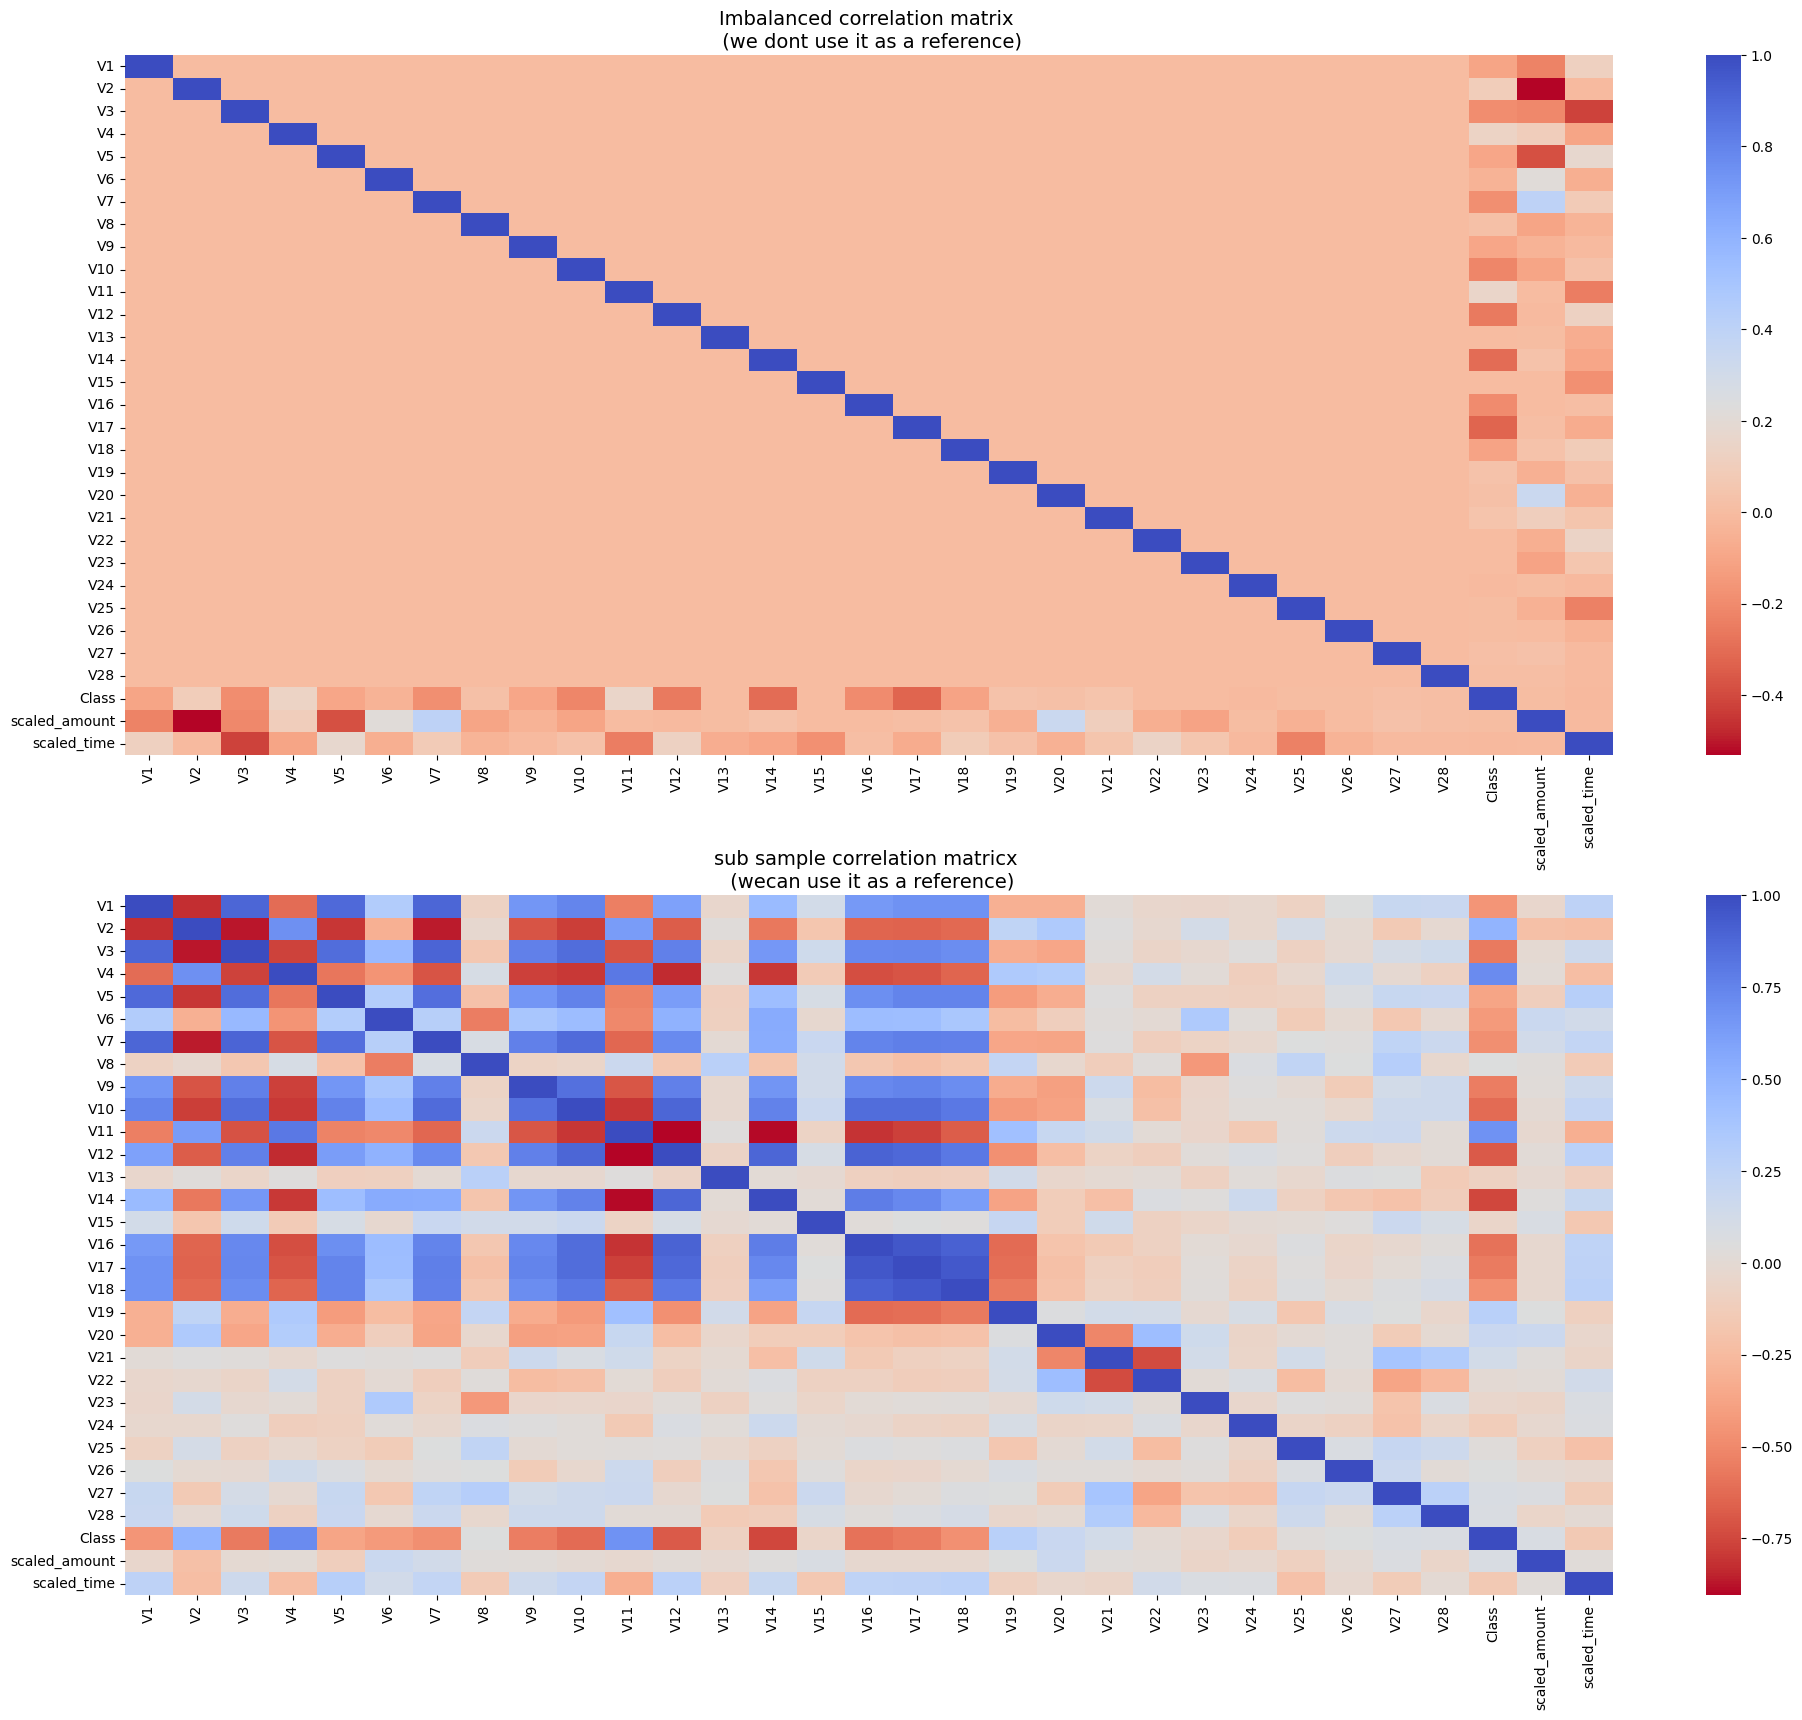

In [14]:
f, (ax1, ax2 ) = plt.subplots(2, 1, figsize = (24, 20))

# Entire Dataframe

corr = df.corr()

sns.heatmap(corr, cmap = "coolwarm_r", annot_kws={"size" : 20}, ax = ax1)
ax1.set_title("Imbalanced correlation matrix \n (we dont use it as a reference)", fontsize = 14)


sub_sample_corr = new_df.corr()

sns.heatmap(sub_sample_corr, cmap = "coolwarm_r", annot_kws={"size": 20}, ax = ax2)
ax2.set_title("sub sample correlation matricx \n (wecan use it as a reference)", fontsize = 14)

##### summary of the correlation matrics of the sub sample df
negative correlation: as we can see v10, v12, v14, and v17 are highly negatively coorelated when these feature decreases there is a hign chance of the detection going to be fraud.


positive correlation: as the sub samle referance there is small amount of features that are positively related compared to the negatively coorelatd feaures, these are as we can see v2, v4, v11, v19 as the values of these increase ther is high chance of the detection going to be fraud

##### BoxPlots

AttributeError: 'Axes' object has no attribute 'set_tiled'

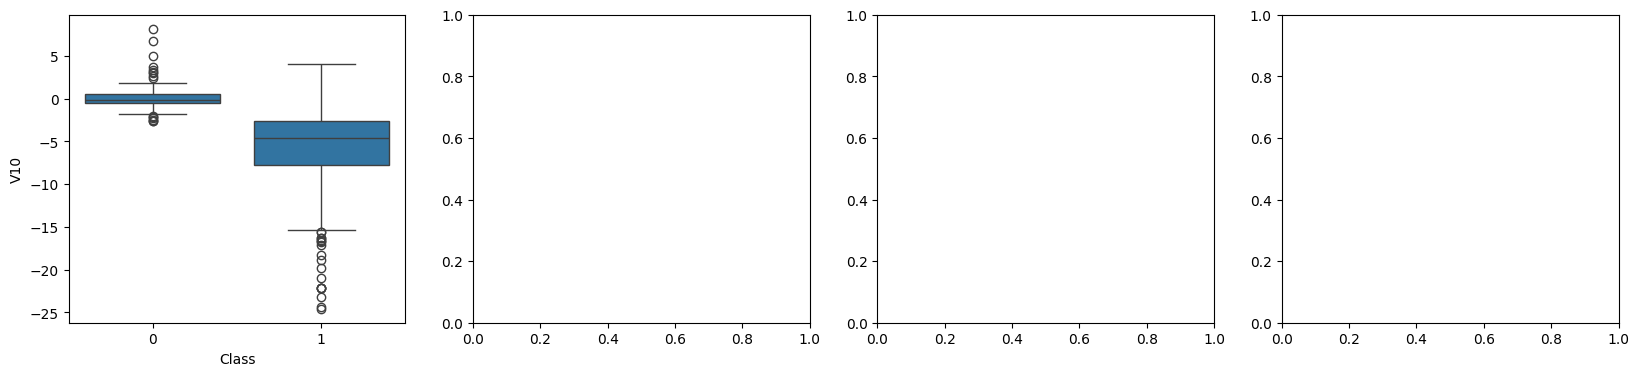

In [ ]:
f, axes = plt.subplots(ncols = 4, figsize = (20, 4))

# Negative Correlations with our class (The lower our features vlaues the more likely it will be a fraud  transaction)
sns.boxplot(x = "Class", y = "V10", data = new_df , ax = axes[0])
axes[0].set_title("v10 vs class negative coorelation")

sns.boxplot(x = "Class", y = "V12", data = new_df, ax = axes[1])
axes[1].set_title("v12 vs class negativecoorelation")

sns.boxplot(x = "Class", y = "V14", data = new_df, ax = axes[2])
axes[2].set_title("v14 v")